# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\nitis\Dropbox\My PC (LAPTOP-4LSAORKH)\Documents\Data Science\Projects\Black Friday data\archive\train.csv")

# Data Exploration

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
df.shape

(550068, 12)

In [5]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

Columns Product ID and User_ID are of no use.Dropping both the column

In [6]:
data=df.drop(['User_ID','Product_ID'],axis=1)

In [7]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

Checking for null values

In [8]:
total=data.isnull().sum()

In [9]:
percent=((data.isnull().sum())/data.isnull().count())

In [10]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [11]:
missing_data

,Total,Percent
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,0.315666
Product_Category_3,383247,0.696727
Purchase,0,0.000000


As you can see for Product_Category_3 around 69% of the data is blank.So dropping that table.

In [12]:
data1=data.drop(['Product_Category_3'],axis=1)

In [13]:
data1

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,NaN,7969
...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,NaN,368
550064,F,26-35,1,C,3,0,20,NaN,371
550065,F,26-35,15,B,4+,1,20,NaN,137
550066,F,55+,1,C,2,0,20,NaN,365


The data for column Product_Category_2 is not normally distributed.

<AxesSubplot:xlabel='Product_Category_2', ylabel='Density'>

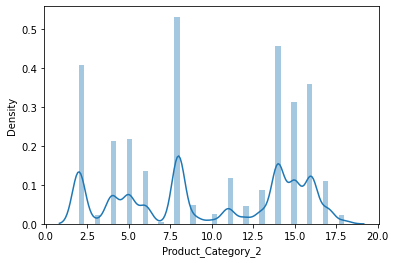

In [14]:
sns.distplot(data1['Product_Category_2'])

Replacing the null values in column Product_Category_2 with mode

In [15]:
data1['Product_Category_2'] = data1['Product_Category_2'].fillna(data1['Product_Category_2'].mode()[0])

Checking again if there is any null values in our data.

In [16]:
data1.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

# Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Question 1 : Are females buying higher value purchases than males ?

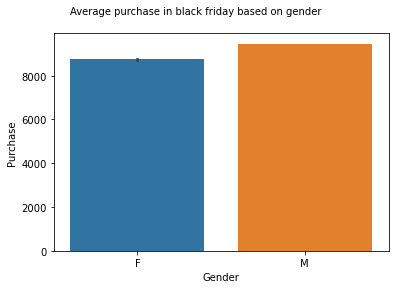

In [17]:
sns.barplot(x = 'Gender',y = 'Purchase',data=data1)
plt.text(-0.4,10800,'Average purchase in black friday based on gender')
plt.show()

Ans- No,males buying higher value purchases than females but the difference not large.

Question 2-Are males buyers more than females buyers ?

In [18]:
malesPurchaserData = data1.loc[data1['Gender'] == 'M']
femalsPurchaserData = data1.loc[data1['Gender'] == 'F']


In [29]:
print('Number of Male buyers=',malesPurchaserData.shape[0])
print('Number of Female Buyers=',femalsPurchaserData.shape[0])

Number of Male buyers= 414259
Number of Female Buyers= 135809


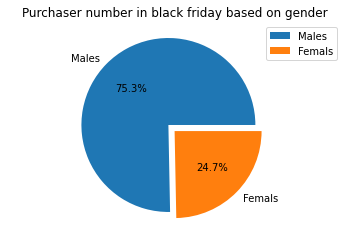

In [36]:
genderCountData = [malesPurchaserData.shape[0],femalsPurchaserData.shape[0]]
labels=['Males','Femals']
plt.axis('equal')

plt.pie(genderCountData, labels=labels,
              explode=[0.1,0],
              autopct='%1.1f%%')

plt.legend(labels)
plt.title('Purchaser number in black friday based on gender')
plt.show()

Ans- Yes Male buyers are more than Female Buyers significantly.

#  Heatmap shows how strongly are 2 features correlated

<AxesSubplot:>

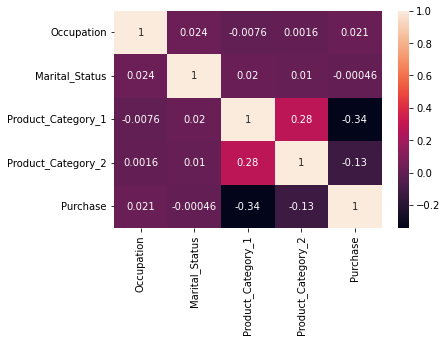

In [39]:
sns.heatmap(data1.corr(),annot=True)

Question 3 : Do people who are married have more action towards buying ?

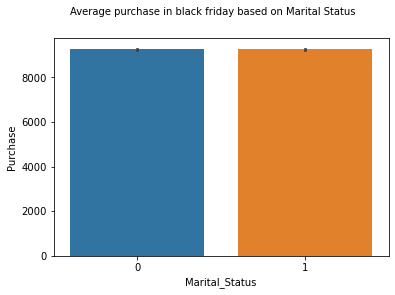

In [40]:
sns.barplot(x = 'Marital_Status',y = 'Purchase',data=data1)
plt.text(-0.4,10800,'Average purchase in black friday based on Marital Status')
plt.show() 

Ans- The Purchases are almost same.

 Are Purchase from product of category 1 more or from product of category 2 ?

In [45]:
Product_Category_1_sum=data1['Product_Category_1'].sum()
Product_Category_2_sum=data1['Product_Category_2'].sum()


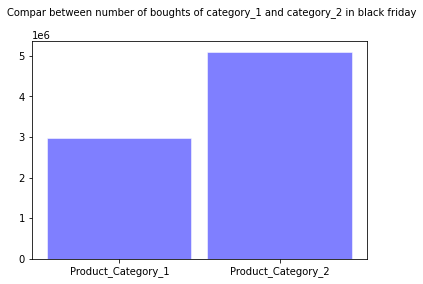

In [44]:
labels = ['Product_Category_1','Product_Category_2']
values = [Product_Category_1_sum,Product_Category_2_sum]
plt.bar(labels,values, width=.9, facecolor='b', edgecolor='w', alpha=.5)
plt.text(-0.7,6000000,'Compar between number of boughts of category_1 and category_2 in black friday')
         
plt.show()

Ans- We can clearly see that product_Category_2 Purchases are more.